# Validation of Clustering
#### Author: Andrew Auyeung

The goal of this notebook is to check how well the clustering separates the topics according to their individual documents.  

Each Cluster is made from analyzing document vectors and clustering on document similarity based on cosine distance. The documents in the cluster are tagged with their strongest topic recieved from NMF.  Using this, a single cluster will have a unique distribution of topics.  

The question to answer is:  Does an individual document's topic distribution reflective of the cluster that document belongs to?

In [3]:
from nlp import NLPPipe
from gensim.models.doc2vec import Doc2Vec
import pandas as pd
import numpy as np

In [4]:
# Load nmf model
nmf_model = NLPPipe()
nmf_model.load_pipe(filename='../models/nmf_model.mdl')

# load clean text
articles = pd.read_csv('../src/clean_text.csv', index_col=0, sep='\t')

# load cluster-topic mat
clusters = pd.read_csv('../src/article_cluster_topic.csv', index_col=0)

Get Doc-Topic-Matrix (dtm)

In [5]:
doc_term = nmf_model.vectorizer.transform(articles['text'])

In [6]:
doc_topic = nmf_model.model.transform(doc_term)

In [7]:
dtm = pd.DataFrame(doc_topic, columns=[f'Topic {str(i)}' for i in range(30)], index=articles['article_id'])

In [8]:
dtm

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
article_id,,,,,,,,,,,,,,,,,,,,,
42343,0.000000,0.000000,0.000000,0.000000,0.000000,0.026795,0.000000,0.000000,0.000000,0.000000,...,0.037590,0.000000,0.000000,0.000000,0.000000,0.000000,0.019837,0.000000,0.000000,0.000000
42356,0.000000,0.001042,0.000000,0.017649,0.000000,0.013376,0.000000,0.034122,0.009723,0.000000,...,0.000000,0.000000,0.000486,0.000000,0.000000,0.000000,0.000000,0.015990,0.000000,0.007462
42424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.000000,0.000000,...,0.124587,0.050167,0.000000,0.000000,0.000000,0.000000,0.000000,0.002118,0.000000,0.000000
42431,0.003049,0.000000,0.000000,0.000000,0.000000,0.013786,0.000442,0.000000,0.000000,0.000000,...,0.011032,0.000000,0.000280,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.010367
42445,0.002229,0.000000,0.000000,0.000000,0.000000,0.020911,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42291,0.006119,0.000000,0.000000,0.001568,0.000000,0.003258,0.003032,0.000000,0.000000,0.003085,...,0.003590,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42303,0.008548,0.000000,0.000000,0.000000,0.000416,0.008736,0.005694,0.002180,0.000680,0.000000,...,0.000648,0.002010,0.001475,0.000000,0.001695,0.000380,0.000000,0.000000,0.000000,0.000524
42315,0.004918,0.000000,0.000000,0.000000,0.001852,0.035586,0.000000,0.000700,0.000000,0.000000,...,0.000000,0.016961,0.000000,0.000000,0.009622,0.018686,0.026147,0.006166,0.000000,0.000000


In [9]:
# Cluster Distribution
cluster_dist = clusters.pivot_table(index='cluster', columns='topic', aggfunc='count', fill_value=0)
cluster_dist

article_id                                                   ...       \
topic           0     1    2     3     4    5    6    7     8    9   ...   20   
cluster                                                              ...        
0               15     4  141    18     7  179   70  385    10    1  ...  203   
1               95    14  132     0    10   15  505   60    17  606  ...  131   
2              130     1   30     4     1  110   13   17     2   30  ...   24   
3               40    10   77   101  1828   29  148  166    21   13  ...   45   
4              129    18    8   212    58  410   10    4     7   13  ...  814   
5              324    34  282     5    35  292   50    4  1223   68  ...    0   
6               81     5  175    43     8  909   10   21   311    5  ...   10   
7               30  1039  200    72     9   43  899  527    39   15  ...   11   
8              379     2  420    43     9  216    7    7    81    0  ...   10   
9              134    60   77  1578    32  141   18   82    11   23  ...  727   

                                                       
topic     21   22   23   24   25   26    27   28   29  
cluster                                                
0         32   15   15  105  485   85    11    1   22  
1         50  188    2  107   14   36     2   44   18  
2          9   27    0  129   39  858    14    5    7  
3         13   82   19   24   93   14    12   26   55  
4         30  118    2  246    9   61    29    1  209  
5         75   12    4   58   13   33    83   33    7  
6         20   41  135   47   17   37   242    0  173  
7        795   48   28   17   49   20     4  317    2  
8          8    4   29   35    6   20  1315    3   46  
9        145   77  761   19   16   47    32   19  462  

[10 rows x 30 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
y = dtm.loc[[42343]]

In [ ]:
np.argmax(cosine_similarity(cluster_dist, dtm.loc[[42431]]))

In [17]:
cluster_preds = []
for _, i in clusters.iterrows():
    row_id = i['article_id']
    cluster_preds.append(np.argmax(cosine_similarity(cluster_dist, dtm.loc[[row_id]])))

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

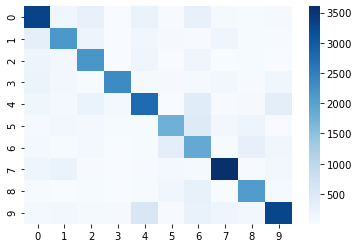

In [19]:
import seaborn as sns
sns.heatmap(confusion_matrix(clusters['cluster'], cluster_preds), cmap='Blues')

In [20]:
print(classification_report(clusters['cluster'], cluster_preds))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4486
           1       0.69      0.68      0.69      3154
           2       0.67      0.75      0.71      2905
           3       0.90      0.73      0.81      3196
           4       0.67      0.66      0.67      4177
           5       0.69      0.62      0.65      2862
           6       0.48      0.63      0.54      2987
           7       0.83      0.82      0.83      4390
           8       0.72      0.77      0.74      2725
           9       0.77      0.70      0.73      4741

    accuracy                           0.71     35623
   macro avg       0.72      0.71      0.71     35623
weighted avg       0.72      0.71      0.72     35623



In [77]:
res = nmf_model.model.transform(nmf_model.vectorizer.transform(['cnn'.lower()]))
np.argmax(cosine_similarity(cluster_dist, res))

7

In [93]:
dtm

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
article_id,,,,,,,,,,,,,,,,,,,,,
42343,0.000000,0.000000,0.000000,0.000000,0.000000,0.026795,0.000000,0.000000,0.000000,0.000000,...,0.037590,0.000000,0.000000,0.000000,0.000000,0.000000,0.019837,0.000000,0.000000,0.000000
42356,0.000000,0.001042,0.000000,0.017649,0.000000,0.013376,0.000000,0.034122,0.009723,0.000000,...,0.000000,0.000000,0.000486,0.000000,0.000000,0.000000,0.000000,0.015990,0.000000,0.007462
42424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.000000,0.000000,...,0.124587,0.050167,0.000000,0.000000,0.000000,0.000000,0.000000,0.002118,0.000000,0.000000
42431,0.003049,0.000000,0.000000,0.000000,0.000000,0.013786,0.000442,0.000000,0.000000,0.000000,...,0.011032,0.000000,0.000280,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.010367
42445,0.002229,0.000000,0.000000,0.000000,0.000000,0.020911,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42291,0.006119,0.000000,0.000000,0.001568,0.000000,0.003258,0.003032,0.000000,0.000000,0.003085,...,0.003590,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42303,0.008548,0.000000,0.000000,0.000000,0.000416,0.008736,0.005694,0.002180,0.000680,0.000000,...,0.000648,0.002010,0.001475,0.000000,0.001695,0.000380,0.000000,0.000000,0.000000,0.000524
42315,0.004918,0.000000,0.000000,0.000000,0.001852,0.035586,0.000000,0.000700,0.000000,0.000000,...,0.000000,0.016961,0.000000,0.000000,0.009622,0.018686,0.026147,0.006166,0.000000,0.000000


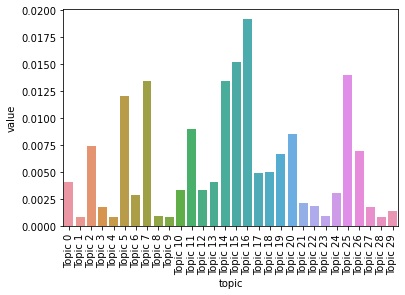

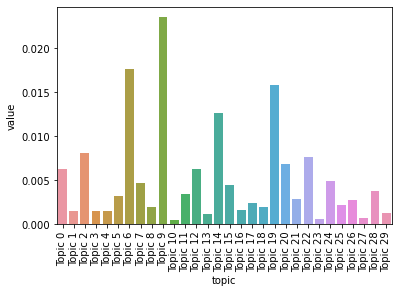

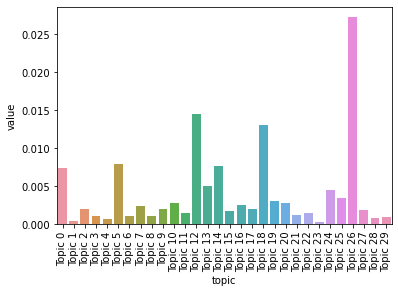

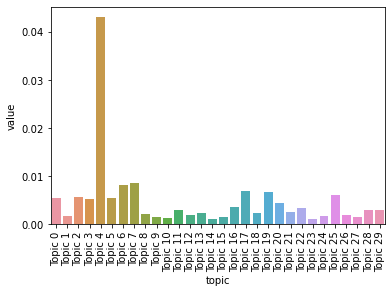

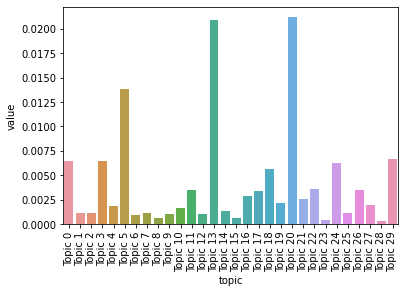

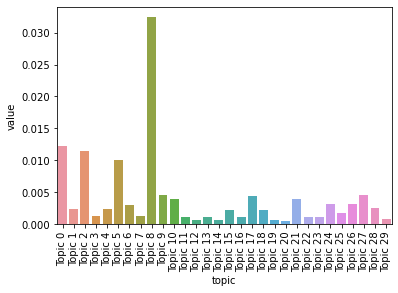

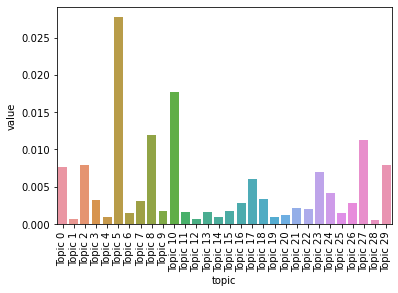

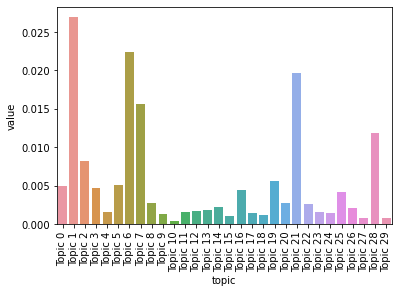

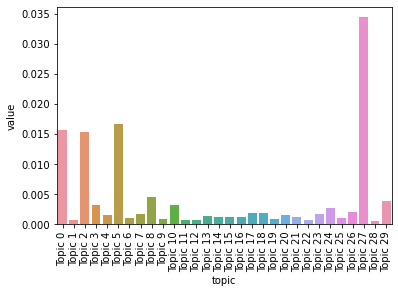

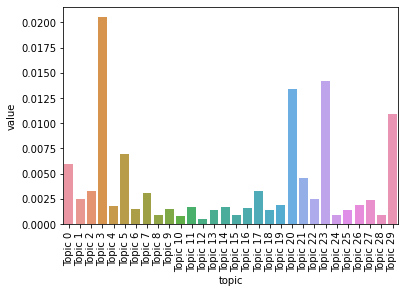

In [125]:
for i in range(10):
    current_cluster = dtm.loc[clusters[clusters.cluster==i]['article_id']].mean().reset_index()
    current_cluster.columns=['topic', 'value']
    plt.figure()
    sns.barplot(x='topic', y='value', data=current_cluster)
    plt.xticks(rotation=90)
    plt.show()

In [113]:
clust0 = dtm.loc[clusters[clusters.cluster==0]['article_id']].mean().reset_index()

In [121]:
clust0.columns=['topic', 'value']

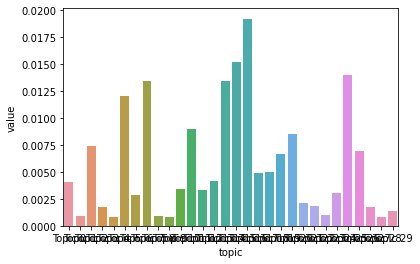

In [122]:
sns.barplot(x='topic', y='value', data=clust0)

In [124]:
import matplotlib.pyplot as plt

In [1]:
clusters.head()

NameError: name 'clusters' is not defined